<a href="https://colab.research.google.com/github/CarlosGordon/Calculus-II/blob/main/sympyGeneral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Symbols can be defined as follows:

In [ ]:
x = smp.symbols('x')

You can then use various mathematical operators on the defined symbols

In [ ]:
x**2

x**2

In [ ]:
smp.sin(x)

sin(x)

There are many many functions built into sympy

In [ ]:
#smp.

Can save expressions in new variables

In [ ]:
y = x**2 + 4*x + 3
y

x**2 + 4*x + 3

Do operations on the new variables:

In [ ]:
z = y**2
z

(x**2 + 4*x + 3)**2

Note that it doesn't expand. There are different methods you need to call to do different things with the expression:

In [ ]:
z.factor()

(x + 1)**2*(x + 3)**2

In the notation `smp.solve(f,x)`, sympy finds the value of $x$ that makes $f(x)=0$.

In [ ]:
smp.solve(z,x)

[-3, -1]

In [ ]:
smp.solve(smp.sin(x), x)

[0, pi]

**Good Practice**: If you know that your variable $x$ is real (and in some cases non-negative) it's good to specify this when you define your variables to prevent complicated issues when solving complicated problems (especially with integrals).

In [ ]:
x = smp.symbols('x')
smp.solve(x**2+1, x)

[-I, I]

In [ ]:
x = smp.symbols('x', real=True, positive=True)
smp.solve(x+4, x)

[]

Can define many variables at once

In [ ]:
x, y, z = smp.symbols('x y z')
F = x**2+smp.sin(z)*y
F

x**2 + y*sin(z)

Can also solve multivariable expressions, specifying which variable we want to solve for. In each case, $F=0$ is being solved for

In [ ]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [ ]:
y_sols = smp.solve(F,y)
y_sols

[-x**2/sin(z)]

In [ ]:
z_sols = smp.solve(F,z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

Finally, it may be the case that one has a sympy expression but wants to convert it into a numerical function so they can plot on a computer

In [ ]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [ ]:
expr_f = smp.lambdify([x,y], expr)
expr_f(1,2)

3.6651914291880923

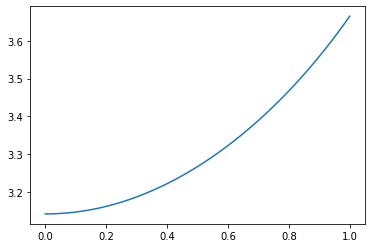

In [ ]:
x_num = np.linspace(0,1,100)
y_num = 2
plt.plot(x_num, expr_f(x_num,y_num))
plt.show()

For multivariable expressions, can also substitute values in

In [ ]:
F

x**2 + y*sin(z)

In [ ]:
F.subs([(y,smp.cos(z)),(z,y)])

x**2 + sin(y)*cos(y)

# Examples

A falling object encounters a moving platform accelerating upwards:

1. Object $h_o(t) = h_0 - v_o t - \frac{1}{2}gt^2$
2. Platform $h_p(t) = v_p t + \frac{1}{2}qt^2$

**Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.**

We need to solve for $v_0$ and $t$ in the two equations

1. $h_0(t) = h_p(t)$
2. $ \frac{dh_0}{dt} (t) = - \frac{dh_p}{dt}(t) $

In sympy, need to construct our system of equations as $EQ_1=0$, $EQ_2=0$, ... In our case, we rewrite them as

1. $h_0(t) - h_p(t) = 0$
2. $\frac{dh_0}{dt} + \frac{dh_p}{dt} = 0$

In [ ]:
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)

Define expressions

In [ ]:
h0t = h0 - v0*t - smp.Rational(1,2)*g*t**2
dh0dt = g*t - v0
hpt = vp*t + smp.Rational(1,2)*q*t**2
dhpdt = vp + q*t

Define equations

In [ ]:
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt

Solve the equations

In [ ]:
smp.solve([eq1, eq2], [t, v0])[0]

((-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q),
 v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)

In [ ]:
t_collide, v_initfall = smp.solve([eq1, eq2], [t, v0])[0]

In [ ]:
v_initfall

v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

In [ ]:
t_collide

(-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q)

**What is the velocity when they collide?**

In [ ]:
dh0dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

-(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [ ]:
dhpdt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

# Calculus (1st year)

In [1]:
x = smp.symbols('x')

NameError: name 'smp' is not defined

## Limits

$$\lim_{x \to \pi} \sin(x/2+ \sin(x))$$

In [ ]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

## Derivatives

$$ \frac{d}{dx} \left( \frac{1+\sin x}{1 - \cos x} \right)^2 $$

In [ ]:
smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x)))**2, x)

$$\frac{d}{dx} f(x+g(x)) $$

In [ ]:
f, g = smp.symbols('f g', cls=smp.Function)

In [ ]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x+g)

In [ ]:
f

In [ ]:
dfdx = smp.diff(f,x)
dfdx

In [ ]:
dfdx.subs([(g, smp.sin(x))]).doit() # need to call doit

## Basic Antiderivatives

$$ \int \csc(x) \cot (x)  dx $$

In [ ]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

## Definite Integrals

$$\int_{0}^{\ln(4)}\frac{e^x dt}{\sqrt{e^{2x}+9}} $$

In [ ]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

$$\int_1^t x^{10} e^x dx $$

In [ ]:
t= smp.symbols('t')

In [ ]:
smp.integrate(x**10*smp.exp(x), (x, 1, t))

# Multivariable Calculus

In [ ]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

## Vectors and Geometry

In [ ]:
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

### Addition and multiplication

In [ ]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

Dot product

In [ ]:
u.dot(v)

u_1*v_1 + u_2*v_2 + u_3*v_3

Cross product

In [ ]:
u.cross(v)

Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

Norm

In [ ]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

$\text{proj}_v(u) = \frac{u \cdot v}{|v|^2} v$

In [ ]:
proj_v_u = u.dot(v)/v.norm()**2 * v
proj_v_u

Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

Lines: $\vec{r}(t) = \vec{r}_0 + t\vec{v}$

In [ ]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

Planes: $\vec{n} \cdot (P_0-\left<x,y,z\right>) = 0$

In [ ]:
P0 = smp.Matrix([4,4,8])
r = smp.Matrix([x,y,z])
n = smp.Matrix([1,1,1])
n.dot(P0-r)

-x - y - z + 16

## Vector Calculus

### Vector Derivatives

In [2]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

NameError: name 'smp' is not defined

In [3]:
smp.diff(r,t)

NameError: name 'smp' is not defined

**Example:** Find the angle between the velocity and acceleration as a function of time $\theta(t)$

In [ ]:
v = smp.diff(r,t)
a = smp.diff(v,t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm())).simplify()
theta

Find theta at $t=6$

In [ ]:
theta.subs(t,6).evalf()

### Vector Integrals

(Note: Will not add the +C)

In [ ]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

In [ ]:
smp.Integral(r,t).doit()

Some cases integrals can't be solved analytically

In [ ]:
from scipy.integrate import quad_vec

In [ ]:
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

In [ ]:
r_f = smp.lambdify([t], r)

In [ ]:
from scipy.integrate import quad_vec
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r_f = smp.lambdify([t], r)
quad_vec(r_f, 0, 1)[0]

### Arclength

$$L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } dt $$

Rare Cases can be done symbolically. Find arclength of $\left< 0, t, t^2 \right>$ from $t=0$ to $t=1$

In [ ]:
r = smp.Matrix([0, t, t**2])
r

In [4]:
r = smp.Matrix([0, t, t**2])
smp.integrate(smp.diff(r,t).norm(), (t,0,1))

NameError: name 'smp' is not defined

# Examples

The magnetic field at a point $\vec{r}$ of a current configuration is

$$\vec{B}(\vec{r}) = \frac{\mu_0}{4\pi}\int_t \frac{I \frac{d\vec{\ell}}{dt} \times (\vec{r}-\vec{\ell})}{|\vec{r}-\vec{\ell}|^3} dt $$

where $\vec{r} = (x,y,z)$ and $\vec{l} = (f(t), g(t), h(t))$ is a 1D curve in space that gives the location of the wire.

**Part 1: Use Sympy to find the integrand as a single 3-vector**

In [ ]:
x, y, z, t, I, mu0 = smp.symbols('x y z t I \mu_0', real=True)
f, g, h = smp.symbols('f g h', cls=smp.Function)
f=f(t)
g=g(t)
h=h(t)

Define $\vec{r}$, $\vec{\ell}$ and $\vec{d\ell/dt}$

In [ ]:
r = smp.Matrix([x,y,z])
l = smp.Matrix([f,g,h])
dldt = smp.diff(l)

Define integrand

In [ ]:
dBdt = I * dldt.cross(r-l) / (r-l).norm()**3

In [ ]:
dBdt

Matrix([
[I*(-(y - g(t))*Derivative(h(t), t) + (z - h(t))*Derivative(g(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[ I*((x - f(t))*Derivative(h(t), t) - (z - h(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)],
[I*(-(x - f(t))*Derivative(g(t), t) + (y - g(t))*Derivative(f(t), t))/(Abs(x - f(t))**2 + Abs(y - g(t))**2 + Abs(z - h(t))**2)**(3/2)]])

**Part 2**: Find the magnetic field a distance $H$ above a ring of radius $R$ flowing clockwise

In [ ]:
R, H = smp.symbols('R, H', real=True)

In [ ]:
dBdt = dBdt.subs([(f, R*smp.cos(t)),
                  (g, R*smp.sin(t)),
                  (h, 0),
                  (x,0), (y,0), (z,H)]).doit()
dBdt.simplify()
dBdt

Matrix([
[H*I*R*cos(t)/(H**2 + R**2)**(3/2)],
[H*I*R*sin(t)/(H**2 + R**2)**(3/2)],
[      I*R**2/(H**2 + R**2)**(3/2)]])

Find magnetic field

In [ ]:
mu0/(4*smp.pi) * smp.integrate(dBdt, [t,0,2*smp.pi])

Matrix([
[                                    0],
[                                    0],
[I*R**2*\mu_0/(2*(H**2 + R**2)**(3/2))]])

For more ccomplicated electrical wire configurations, see my video on solving for the magnetic field of an arbtriary wire (uses numerical integration)

## Partial/Directional Derivatives

In [ ]:
x, y, z = smp.symbols('x y z')

### Basics

Partial Derivatives $\partial f / \partial x$ and $\partial f / \partial y$ of $f(x,y)=y^2\sin(x+y)$

In [ ]:
f = y**2 * smp.sin(x+y)
smp.diff(f,x)

y**2*cos(x + y)

In [ ]:
smp.diff(f,y)

y**2*cos(x + y) + 2*y*sin(x + y)

Or more complicated things like $\frac{\partial^3 f}{\partial xy^2}$

In [ ]:
smp.diff(f,y,y,x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

### The Chain Rule

In [ ]:
t = smp.symbols('t')
x, y, z, w, v =smp.symbols('x, y, z w v', cls=smp.Function)

* Suppose $x$, $y$, and $z$ are functions of $t$
* $w$ is a function of $x$, $y$, and $z$. i.e $w=w(x,y,z)$

Find $dw/dt$

In [ ]:
x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)

In [ ]:
w

w(x(t), y(t), z(t))

Can keep things in a more functional form:

In [ ]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

Or put in specific functions:

In [ ]:
w1 = x**2+smp.exp(y)*smp.sin(z)

In [ ]:
smp.diff(w1,t)

2*x(t)*Derivative(x(t), t) + exp(y(t))*sin(z(t))*Derivative(y(t), t) + exp(y(t))*cos(z(t))*Derivative(z(t), t)

In [ ]:
w1 = x**2+smp.exp(y)*smp.sin(z)
smp.diff(w1,t).subs([(x, smp.sin(t)),
                    (y, smp.cos(t)),
                    (z, t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

## Multiple Integrals

In rare cases these can be done symbolically:

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xdzdydx$$

In [ ]:
x, y, z = smp.symbols('x, y, z')
f = x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

1/8